In [1]:
#Для общего топа интересна классификация на основе часовых поясов. 
#Постараться выделить часы наибольшей активности игроков в городах данного пояса.
import pandas as pd
import seaborn
import geopy
from datetime import datetime
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def hour(timestamp):
    now  = datetime.fromtimestamp(timestamp)
    return now.hour

def hour_utc(timestamp):
    now  = datetime.utcfromtimestamp(timestamp)
    return now.hour

def get_timezone(city):
    place,(lat,lon) = do_geocode(city)
    timezone = do_timezone((lat,lon))
    return timezone

def do_geocode(address):
    g = geopy.GoogleV3()
    try:
        return g.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

def do_timezone((lat,lon)):
    g = geopy.GoogleV3()
    try:
        return g.timezone((lat,lon))
    except GeocoderTimedOut:
        return do_timezone((lat,lon))    
    
print "imported!"

imported!


1603           Leipzig
1604           Jakarta
1605    Rio De Janeiro
1606        Manchester
1607         Bucharest
1608        Birmingham
1609            Athens
1610          Montréal
1611        Montevideo
1612      Buenos Aires
1613          Belgrade
1614         São Paulo
1615             Paris
1616           Bangkok
1617          Istanbul
1618            Warsaw
1619           Hamburg
1620            London
1621             Hanoi
1622            Berlin
Name: city, dtype: object
City list was created. The length of city list:  1623


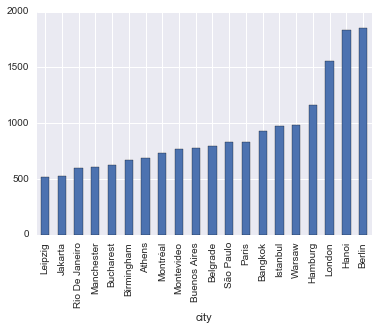

In [2]:
#найдем города по количеству игроков
pinfo_ww = pd.read_csv("pinfo_ww.csv", sep="|")
table_count_players = pinfo_ww.groupby('city').size()
table_count_players.sort_values(inplace=True)
table_count_players.tail(20)
table_count_players.sort_values().tail(20).plot(kind='bar')
table_count_players = table_count_players[table_count_players > 25]
df_table_count_players = pd.DataFrame(table_count_players)
df_table_count_players = df_table_count_players.reset_index(level='city')
city_list = df_table_count_players.city
print city_list.tail(20) #города ко-во пользователей которых составляет >25
print "City list was created. The length of city list: ",len(df_table_count_players)

In [3]:
pact_ww = pd.read_csv("pact+pinfo.csv", sep="|")
print pact_ww.columns

print "Read!"

Index([u'Unnamed: 0', u'id', u'actdate', u'actdate_num', u'actflag',
       u'payflag', u'pgrflag', u'ml_num', u'transactions', u'quests_end',
       u'm_quests_end', u'days_from_last_actdate', u'days_from_last_payment',
       u'utc_timestamp', u'gender', u'birthyear', u'country', u'region',
       u'city', u'traffic', u'traftype'],
      dtype='object')
Read!


In [4]:
group = pact_ww.groupby(['city','utc_timestamp','actflag','actdate','region'], as_index=True).size()

In [5]:
#print grope.head(40)
group = group.reset_index(level=['city','utc_timestamp','actflag','actdate','region'])

In [6]:
group = group[group.actflag != False]


In [7]:
group["hour"] = "" #добавляем параметр

In [8]:
hour_utc_list = []
for stamp in group.utc_timestamp:
    hour_utc_list.append(hour_utc(stamp))

In [9]:
group["hour"] = hour_utc_list

In [10]:
print group.head(3)
print "len: ",len(group.hour)

             city  utc_timestamp actflag     actdate region  0  hour
10   's-graveland     1452694444    True  2016-01-13     07  1    14
11   's-graveland     1452694444    True  2016-01-14     07  1    14
12  's-gravenhage     1453645320    True  2016-01-24     11  1    14
len:  753068


In [11]:
pinfo_ww = pd.read_csv("pinfo_ww.csv", sep="|")
geolocator = Nominatim()
TZ_list = []

In [12]:
try:
    TZ = pd.read_csv("time_zone.csv")
    TZ_list = TZ.time_zone
except:
#ПАРСИНГ ЧАСОВОГО ПОЯСА ГОРОДОВ (city_list)
#ЗАПУСКАТЬ ЕСЛИ НЕ СФОРМИРОВАН TZ_list !!!!!!!!!!!!
    i = 1
    for city in city_list:
        tmp = get_timezone(city)
        TZ_list.append(tmp)
        print tmp# ," :::  ", i
        #i+=1


In [13]:
print len(TZ_list)

1623


In [14]:
data = {
    'city':city_list,
    'time_zone':TZ_list
}
df_city_time_zone = pd.DataFrame(data)

In [15]:
print df_city_time_zone.head(5)

              city            time_zone
0            Espoo      Europe/Helsinki
1  Vitry-sur-seine         Europe/Paris
2         Oak Park      America/Chicago
3        Escondido  America/Los_Angeles
4         Le Grand  America/Los_Angeles


In [16]:
df_result = pd.merge(group, df_city_time_zone, how='inner', on='city')

111


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000102CABF98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000011C860D30>]], dtype=object)

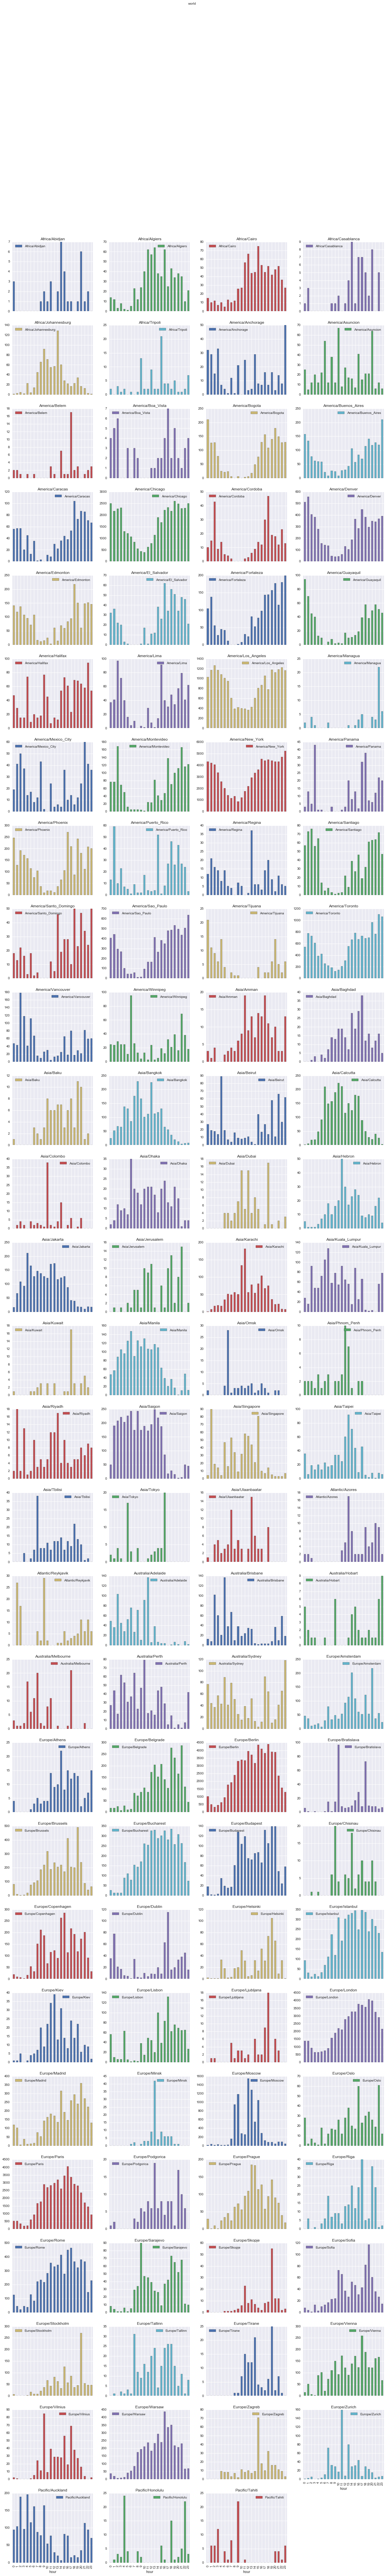

In [28]:
#Формируем DataFrame по часовым поясам, городам, часам
#print df_result
df_result.columns
gr = df_result.groupby(['time_zone','hour']).size()
gr = gr.rename("maximum_users")
gr = gr.reset_index(['time_zone','hour'])

list_gr = gr.time_zone
list_gr = set(list_gr)
print len(list_gr)
table = gr.pivot_table(index="hour", columns="time_zone", values="maximum_users")
table.plot(kind = "bar", title="world", subplots=True, figsize=(20,125), layout=(28,4))